In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%%capture
!pip install transformers

In [ ]:
from transformers import AutoModelForSeq2SeqLM, T5TokenizerFast
import torch

In [ ]:
use_gpu = 0
if torch.cuda.is_available():
  if use_gpu == 0:
    device = torch.device('cuda')
  else:
    device = torch.device('cuda:' + use_gpu)
else:
  device = torch.device('cpu')

In [ ]:
# MODEL_NAME = 'UrukHan/t5-russian-summarization'
# MAX_INPUT = 256

In [ ]:
# tokenizer = T5TokenizerFast.from_pretrained(MODEL_NAME)
# model = AutoModelForSeq2SeqLM.from_pretrained(MODEL_NAME)

In [ ]:
# Входные данные (можно массив фраз или текст)
# input_sequences = ["""
# 🎄Хитсолочка 2023🎄 (eng below)

# #новый_год@hits_tsu

# Встречайте самую новогоднюю игру наступающего 2023 года!

# Совсем скоро наступит самый долгожданный зимний праздник — Новый год, а это значит, что пришло время для традиционного новогоднего квеста!

# Заинтригованы? Не будем томить: в этом году мы запускаем Хитсолочку 2023! Можете играть один или собрать союз (не более трёх человек) — вместе играть веселее! У каждого союза появится своя новогодняя полянка во 2 корпусе, которую вам предстоит наполнить персонажами и украсить. Выполняйте задания, получайте палочки и рубины, и обменивайте их на украшения полянки! Хитсолочка будет открыта до 23 декабря.

# После формирования союза отправляйте Эльфу кодовую фразу «МЫ В ИГРЕ» вместе с названием вашего союза и ссылкой на ВК всех союзников.

# Важное правило: никому, кроме эльфов и союзников, не отправлять ответы на задания!
# """] 
# можно использовать одиночные фразы: 
# input_sequences = 'сеглдыя хорош ден'

In [ ]:
# # Токенизирование данных
# task_prefix = "Spell correct: " 
# if type(input_sequences) != list: input_sequences = [input_sequences]
# encoded = tokenizer(
#   [task_prefix + sequence for sequence in input_sequences],
#   padding="longest",
#   max_length=MAX_INPUT,
#   max_output = 512,
#   truncation=False,
#   return_tensors="pt",
# )

In [ ]:
# Прогнозирование
# predicts = model.generate(**encoded.to(device))

In [ ]:
# Декодируем данные
# tokenizer.batch_decode(predicts, skip_special_tokens=True)

In [ ]:
# Декодируем данные
# tokenizer.batch_decode(predicts, skip_special_tokens=True)

# Load model utils

In [20]:
%%capture

!pip install transformers
!pip install datasets transformers[sentencepiece]
!pip install sentencepiece

In [21]:
from transformers import T5ForConditionalGeneration, T5Tokenizer
import torch

In [22]:
MODEL_NAME = 'cointegrated/rut5-base-absum'
model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)

In [23]:
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

In [24]:
model.cuda();
model.eval();
'done'

'done'

In [25]:
def summarize(
    text, n_words=None, compression=None,
    max_length=1000, num_beams=3, do_sample=False, repetition_penalty=15.0, 
    **kwargs
):
    """
    Summarize the text
    The following parameters are mutually exclusive:
    - n_words (int) is an approximate number of words to generate.
    - compression (float) is an approximate length ratio of summary and original text.
    """
    if n_words:
        text = '[{}] '.format(n_words) + text
    elif compression:
        text = '[{0:.1g}] '.format(compression) + text
    x = tokenizer(text, return_tensors='pt', padding=True).to(model.device)
    with torch.inference_mode():
        out = model.generate(
            **x, 
            max_length=max_length, num_beams=num_beams, 
            do_sample=do_sample, repetition_penalty=repetition_penalty, 
            **kwargs
        )
    return tokenizer.batch_decode(out, skip_special_tokens=True)

In [ ]:
# text="""
# Уважаемые студенты!

# Объявлен конкурс на соискание повышенной государственной академической стипендии во втором семестре 2022-2023 учебного года. На конкурс принимаются достижения с 1 января по 31 декабря 2022 года.

# 👉🏻Напоминаем, претендовать на соискание стипендии могут студенты всех курсов обучения, соответствующие нижеперечисленным требованиям:
# 1. назначенные к 6 февраля 2023 года на обычную государственную академическую стипендию;
# 2. имеющие достижения в учебной, научно-исследовательской, общественной, культурно-творческой и спортивной деятельности.

# ❗Обратите внимание на изменения в разделах "Научно-исследовательская деятельность" и "Спортивная деятельность".

# ❗Приём документов на конкурс проводится до 13.02.2023 года (включительно).

# Комплект документов:
# 1) Информационная карта с подписью соискателя.
# 2) Скриншот из личного кабинета студента, с подтверждением успеваемости или выписка из зачетной книжки (или копия зачетной книжки при наличии всех проставленных предметов).
# 3) Электронное портфолио в системе «Фламинго».

# ❗Напоминаем о необходимости подтвердить в системе Фламинго свое участие в конкурсе (перейдите по ссылке ниже в объявление о конкурсе и нажмите УЧАСТВОВАТЬ).
# ‼ Документы должны быть оформлены строго в соответствии с Регламентом заполнения электронных портфолио. Документы оформленные не по правилам рассматриваться в конкурсе не будут.

# Подробная информация и документы к конкурсу по ссылке в системе Фламинго:
# http://flamingo.tsu.ru/activity/656
# """

In [ ]:
out = summarize(
    'В ТГУ есть ещё такое классное место. Кто быстрее напишет название и где именно оно находится?😏', 
    n_words=None, 
    compression=None,
    max_length=1000, 
    do_sample=False
    )

out

['В ТГУ есть классное место.']

In [ ]:
text_list = ["""
Поздравим наших спортсменов ⭐

#поздравляем@hits_tsu

Диана Змеева , студентка HITs, победила в конкурсе «Студент года — 2022» в номинации «Спортсмен года» 🎉

Но это еще не все! Наши студенты показали хорошие результаты в области спорта в этом году!

А именно:
• Анна Торгунакова, Наталья Тюделекова, Ирина Плотникова заняли третье место в Первой лиге Спартакиады по волейболу 🥉
• Юсеф Абуелата занял третье место на Соревнованиях по дартсу среди студентов Дальнего зарубежья 🥉
• Иван Бойцов занял третье место в Высшей лиге Спартакиады по волейболу 🥉
• Иван Гулевский участвовал в соревнованиях города Томска и Томской области 🏆
• Дмитрий Волков занял 5 место в Личном первенстве ТГУ по настольному теннису 🏆
• Елена Карелина заняла 1 место в Спартакиаде между факультетами по настольному теннису 🥇

Много хороших результатов было и на Спартакиаде первокурсников:
• Артём Ким — плавание (2 место) 🥈
• Александр Дядяшкин — волейбол (участие) 🏆
• Дмитрий Волков — ГТО (1 место), ГТО (команда, 2 место), настольный теннис (команда, 2 место) 🥇🥈🥈
• Даниил Хахулин — ГТО (участие) 🏆
• Елена Карелина — настольный теннис (2 место) 🥈
• Виктор Кузубов — ГТО (2 место), настольный теннис (2 место) 🥈🥈
• Фёдор Ушаков — шахматы (команда, 4 место) 🏆

Нам остаётся только поздравить их с этим результатом и пожелать им достичь ещё больших успехов в предстоящем году!
""",
"""
Новогоднее обращение

До нового года остался всего час, и пока старый год ещё не ушёл, мы спешим поздравить вас!

Дорогие наши студенты, преподаватели и все причастные. Мы вас безумно любим и ценим. Ваша невероятная энергия согревает нас холодными зимними вечерами и создаёт волшебство даже в серые будни. Желаем вам хорошенько отдохнуть на новогодних праздниках, набраться сил и в следующем году быть такими же яркими звездочками на зимнем небосводе ✨

А ещё вас хочет поздравить руководитель нашей программы, Олег Алексеевич Змеев. Так что скорее смотрим его традиционное новогоднее обращение 🤗

С Новым Годом! 🎄
""",
"""
 Новогодний «Квиз, HITs» 🎅

Праздник к нам приходит! Предлагаем вам немного отвлечься от декабрьских дедлайнов и поднять своё новогоднее настроение в приятной компании хитсят на нашем Новогоднем квизе 🎆

Когда и где?
🎄 24 декабря
🎄 18:30
🎄 2 корпус
*аудиторию сообщим чуть позже

Собирай команду до 6 человек, регистрируйся по ссылке снизу и приходи к нам веселиться 💙
👉🏻 https://forms.gle/ocGdYMKkrW5mGoBEA
""",
"""
Программируешь на C++, хорошо знаешь линейную алгебру и разбираешься в алгоритмах?

UNIGINE открывает набор на стажировку в Томске 🎉

Компания UNIGINE занимается разработкой собственного 3D-движка и интерактивных проектов на его основе. Движок используют более 250 компаний, на нем создаются сложные виртуальные миры.

Что ты получишь?

✨ оплачиваемую стажировку
✨ запись о профессиональном опыте в резюме и ТК
✨ возможность продолжить работу в UNIGINE
✨ а также прокачаешь свои навыки на реальных задачах и научишься писать быстрый код

Читай подробности и подавай заявку до 29 января 2023 года: https://internship.unigine.com
""",
"""
Хотите получить оплачиваемый пилот от Гознака и выйти на крупных заказчиков?

Подавайте заявку на участие, если:
✅ у вас команда из 2 и более человек
✅ вы – российская технологическая компания
✅ у вас есть готовый продукт

Основные направления поиска:
📌 Технологии идентификации и биометрии
📌 Печатная электроника
📌 Облачные сервисы
📌 FinTech и платёжные решения
📌 Инновационные материалы
📌 ЦФА, блокчейн и другие технологии для криптовалют
📌 Track&Trace, LogTech
📌 Цифровые сервисы для рынка нумизматики, бонистики и ювелирного дела
📌 Индустриальный IoT
📌 RegTech, LegalTech, HRTech

Финалисты программы получат помощь в развитии и оплачиваемый пилот, а лучшие из лучших – возможность реализовать свое решение при поддержке Гознака.

Узнать подробности программы и оставить заявку можно до 26 декабря 2022 года на сайте: https://edu.iidf.ru/?arrangement=feca3627
"""
]

In [ ]:
# summarize(
#     text, 
#     n_words=None, 
#     compression=None,
#     max_length=1000, 
#     do_sample=False
#     )

In [ ]:
# import random

# def drop_rows(rows):
#   l = len(rows)
#   c = random.randrange(l//2, l)
#   return random.sample(rows, c)

# def shuffle(text):
#   rows = text.split('\n')
#   # rows = list(filter(None, rows))
#   random.shuffle(rows)
#   # rows = drop_rows(rows)
#   return '\n'.join(rows)

In [ ]:
# n_words = 330
# do_sample=True
# max_length=5000
# texts = []

# for i in range(4):
#     s_text = shuffle(text)
#     res = summarize(s_text, n_words=n_words, max_length=max_length, do_sample=do_sample)
#     texts.append(res)
# print('\n'.join(texts))
# print('-'*100)
# # texts = '\n'.join(texts)
# # out = summarize(texts, max_length=3000, do_sample=True)
# # print(out)

In [ ]:

summarize(
        [text_list[TEXT_IDX]], 
        n_words=None, 
        compression=None,
        max_length=3000, 
        do_sample=False
      )

Token indices sequence length is longer than the specified maximum sequence length for this model (964 > 512). Running this sequence through the model will result in indexing errors


['аксандр «ортсмен ода»']

# Day 1

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import trange, tqdm
from pathlib import Path

In [26]:
def get_summary(texts, batch_size):
    dataloader = DataLoader(texts, batch_size=batch_size)
    result_summary = []
    for i_batch, batch in enumerate(tqdm(dataloader)):
      summ_list = summarize(
        batch, 
        n_words=None, 
        compression=None,
        max_length=500, 
        do_sample=True
      )
      result_summary.extend(summ_list)
    return result_summary

In [ ]:
DATA_PATH = Path('data.xlsx')

df = pd.read_excel(DATA_PATH)

In [ ]:
df

,len,text,summaries_cointegrated/rut5-base-absum,translations_and_summarize_fabiochiu/t5-small-medium-title-generation,en_translations_and_summarize_fabiochiu/t5-small-medium-title-generation,text_norm,normalization_translation_summarization_fabiochiu/t5-small-medium-title-generation,en_normalization_translation_summarization_fabiochiu/t5-small-medium-title-generation,opus_ru,opus_en,nllb_for_en_normalization_translation_summarization_fabiochiu/t5-small-medium-title-generation
0,16,С праздником🤝🏻,С праздником.,С праздником Holdinghappy Holdinghappy Holding...,Happy holidayHappy holidayHappy holidayHappy h...,С праздником,С праздником и праздниками!,Happy Holiday Holidays and Happy Holidays!,"Счастливые праздники, Счастливые праздники, Сч...","Happy Holiday, Happy Holidays, Happy Holidays,...",Счастливые праздники и праздники!
1,30,21 сентября покажут красивое💙,В сентябре в Москве пройдет первый день праздн...,21 сентября покажет красивый,September 21 will show beautiful,21 сентября покажут красивое,21 сентября покажут красивые красивые фотограф...,September 21 will show beautiful beautiful pho...,21 сентября покажет тебе красоту.,September 21st will show you the beautiful,21 сентября мы покажем красивые фотографии 21 ...
2,46,"Сессия в самом разгаре. Студенты, вы как?👨‍💻",Сессия в самом разгаре.,"Сессия в полном разгаре. Студенты, как дела?","The session is in full swing. Students, how ar...","Сессия в самом разгаре. Студенты, вы как?","Сессия в полном разгаре. Студенты, как дела?","The session is in full swing. Students, how ar...","Сеанс в середине, сеанс в середине.",The session's in the middle. The session's in ...,"Участники, как дела?"
3,49,Сегодня вспоминаем трагические события в Беслане.,Сегодня вспоминаем трагические события в Беслане.,Сегодня мы вспоминаем трагические события в Бе...,Today we recall the tragic events in Beslan.,Сегодня вспоминаем трагические события в Беслане.,Сегодня мы вспоминаем трагические события в Бе...,Today we recall the tragic events in Beslan.,Сегодня мы вспоминаем трагические события в Бе...,Today we recall the tragic events in Beslan.,Сегодня мы вспоминаем трагические события в Бе...
4,50,Родная Университетская роща с необычного ракурса📸,Родная Университетская роща с необычного ракурса.,Гроун на местной университете под необычным углом,Native University grove from an unusual angle,Родная Университетская роща с необычного ракурса,Гроун на местной университете под необычным уг...,Native University grove from an unusual angle ...,Университетская роща с необычной точки зрения ...,University grove from an unusual perspective f...,Родной университетский сад с необычного угла с...
...,...,...,...,...,...,...,...,...,...,...,...
387,1357,Как не запутаться в сетях?🧐\n\nМногочисленные ...,Эксперты изучили деятельность казахстанских по...,Как не путать в сетях?,How not to get confused in networks? ...,Как не запутаться в сетях?\n\nМногочисленные э...,Как не путать в сетях? #Science_works #Science...,How not to get confused in networks? #SCIENCE_...,Казахским политологам не хватает инструментов ...,Kazakh political scientists lack tools to stud...,Как не путаться в сетях? #SCIENCE_WORKS #SCIEN...
388,1388,Бесплатное обучение по программе «Журналист да...,Журналист данных по федеральному проекту «Соде...,Бесплатное обучение в рамках программы «Журнал...,"Free training under the program ""Data journali...",Бесплатное обучение по программе «Журналист да...,Бесплатное обучение в рамках программы «Журнал...,"Free training under the program ""Data journali...",Бесплатная подготовка по программе журналиста ...,Free training on the Data Journalist program f...,"Бесплатная подготовка по программе ""Данные жур..."
389,1528,На День студента мы приготовили для вас много ...,С 11:00 до 17:00 — Татьянин день в музеях ТГУ,День Татьяны в музеях Цу,Tatyana's Day in the Museums of TSU,На День студента мы приготовили для вас много ...,День Татьяны в музеях Цу,Tatyana's Day in the Museums of TSU,День Татьяна в музеях TG

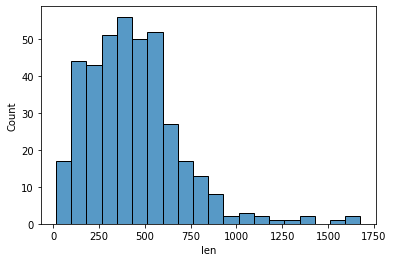

In [ ]:
sns.histplot(data=df, x='len')
plt.show()

In [ ]:
summaries = get_summary(df.text_norm.tolist(), batch_size=64)

  0%|          | 0/7 [00:00<?, ?it/s]

In [ ]:
df[f'summaries_norm_{MODEL_NAME}']=summaries

In [ ]:
df.sample(5)

,len,text,summaries_cointegrated/rut5-base-absum
65,451,+1 награда ТГУ🎉\n\nКоманду университета наград...,Команду ТГУ наградили за организацию набора на...
153,401,Началась регистрация на [https://vk.com/mag_ts...,Регистрация на олимпиаду «Магистр ТГУ»
247,494,"Пост-напоминалка✨Друзья, если у вас возникли в...",Создайте заявку в TSUHelper.
86,468,Передовая инженерная школа «Агробиотек» открое...,В ТГУ откроется первая инженерная школа «Агроб...
16,289,[https://vk.com/hits_tsu|HITs] часто где-то по...,"Студент Игорь Миллер рассказал, как поступает ..."


In [ ]:
DATA_PATH

PosixPath('/content/drive/MyDrive/kreosoft/copy_news.xlsx')

In [ ]:
# df.to_excel(DATA_PATH.parent/'news_processed.xlsx', index=False)

In [ ]:
df.to_excel('result_data.xlsx', index=False)

# Day 2

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import nltk
nltk.download('punkt')

tokenizer = AutoTokenizer.from_pretrained("fabiochiu/t5-small-medium-title-generation")
model = AutoModelForSeq2SeqLM.from_pretrained("fabiochiu/t5-small-medium-title-generation")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
model.cuda().eval()

T5ForConditionalGeneration(
  (shared): Embedding(32128, 512)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 512)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=512, out_features=512, bias=False)
              (k): Linear(in_features=512, out_features=512, bias=False)
              (v): Linear(in_features=512, out_features=512, bias=False)
              (o): Linear(in_features=512, out_features=512, bias=False)
              (relative_attention_bias): Embedding(32, 8)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=512, out_features=2048, bias=False)
              (wo): Linear(in_features=2048, out_features=512, bias=False)
              (dropout): Drop

In [ ]:
TEXT_IDX=0
print(text_list[TEXT_IDX])

len(text_list[TEXT_IDX])


Поздравим наших спортсменов ⭐

#поздравляем@hits_tsu

Диана Змеева , студентка HITs, победила в конкурсе «Студент года — 2022» в номинации «Спортсмен года» 🎉

Но это еще не все! Наши студенты показали хорошие результаты в области спорта в этом году!

А именно:
• Анна Торгунакова, Наталья Тюделекова, Ирина Плотникова заняли третье место в Первой лиге Спартакиады по волейболу 🥉
• Юсеф Абуелата занял третье место на Соревнованиях по дартсу среди студентов Дальнего зарубежья 🥉
• Иван Бойцов занял третье место в Высшей лиге Спартакиады по волейболу 🥉
• Иван Гулевский участвовал в соревнованиях города Томска и Томской области 🏆
• Дмитрий Волков занял 5 место в Личном первенстве ТГУ по настольному теннису 🏆
• Елена Карелина заняла 1 место в Спартакиаде между факультетами по настольному теннису 🥇

Много хороших результатов было и на Спартакиаде первокурсников:
• Артём Ким — плавание (2 место) 🥈
• Александр Дядяшкин — волейбол (участие) 🏆
• Дмитрий Волков — ГТО (1 место), ГТО (команда, 2 место

1355

In [ ]:
_text = """
Congratulations to our athletes ⭐

#congratulations@hits_tsu

Diana Zmeeva , a HITs student, won the contest "Student of the Year - 2022" in the category "Athlete of the Year" 🎉

But that's not all! Our students performed well in sports this year!

Namely:
- Anna Torgunakova, Natalia Tyudelekova, Irina Plotnikova took third place in the First League of the Spartakiad in volleyball 🥉
- Yusef Abuelata took third place in the Far Abroad Students Darts Competition 🥉
- Ivan Boytsov took third place in the Higher League of the Spartakiad Volleyball 🥉
- Ivan Gulevsky took part in the competitions of Tomsk city and Tomsk region 🏆
- Dmitry Volkov took the 5th place in the Table Tennis Personal Championship of TSU 🏆
- Elena Karelina took 1st place in the Spartakiad between the faculties in table tennis 🥇

Many good results were also at the Freshman Spartakiade:
- Artem Kim - swimming (2nd place) 🥈
- Alexander Dyadyashkin - volleyball (participation) 🏆
- Dmitry Volkov - TRP (1st place), TRP (team, 2nd place), table tennis (team, 2nd place) 🥇🥈🥈
- Daniil Khakhulin - TRP (participation) 🏆
- Elena Karelina - table tennis (2nd place) 🥈
- Viktor Kuzubov - TRP (2nd place), table tennis (2nd place) 🥈🥈
- Fedor Ushakov - chess (team, 4th place) 🏆

It only remains for us to congratulate them on this result and wish them even greater success in the coming year!

Translated with www.DeepL.com/Translator (free version)
"""

In [ ]:
inputs = ["summarize: " + _text]

inputs = tokenizer(inputs, max_length=3000, truncation=True, return_tensors="pt")
output = model.generate(**inputs, num_beams=8, do_sample=True, min_length=10, max_length=64)
decoded_output = tokenizer.batch_decode(output, skip_special_tokens=True)[0]
predicted_title = nltk.sent_tokenize(decoded_output.strip())[0]

print(predicted_title)
# Conversational AI: The Future of Customer Service


Congratulations to our athletes  #congratulations@hits_tsu Diana Zmeeva, a HITs student, won the contest "Student of the Year - 2022" in the category "Athlete of the Year"


In [ ]:
text_list[0]

# Ideas

1) модель саммаризации на русском

2) Перевод на англ -> саммаризация на англ -> Перевод на русский [https://huggingface.co/Helsinki-NLP/opus-mt-ru-en | rus_to_eng]

## Day Mynka

In [1]:
%%capture

!pip install transformers
!pip install datasets transformers[sentencepiece]
!pip install sentencepiece
!pip install translators

In [2]:
!pip install emoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.9/240.9 KB 19.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234926 sha256=e0368c9deacd61a9c897c306e1afdcecb7a474379c1cb3ef75493e94cb35d630
  Stored in directory: /root/.cache/pip/wheels/86/62/9e/a6b27a681abcde69970dbc0326ff51955f3beac72f15696984
Successfully built emoji


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import trange, tqdm
from pathlib import Path
import translators as ts
import re
import emoji

Using state  server backend.


In [4]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import nltk
nltk.download('punkt')

tokenizer = AutoTokenizer.from_pretrained("fabiochiu/t5-small-medium-title-generation")
model = AutoModelForSeq2SeqLM.from_pretrained("fabiochiu/t5-small-medium-title-generation")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
model.cuda().eval()
"done"

'done'

In [6]:
def summarize(
    text, n_words=None, compression=None, min_length=10,
    max_length=64, num_beams=8, do_sample=False, repetition_penalty=10.0, 
    **kwargs
):
    """
    Summarize the text
    The following parameters are mutually exclusive:
    - n_words (int) is an approximate number of words to generate.
    - compression (float) is an approximate length ratio of summary and original text.
    """

    text = [f"summarize: {_text}" for _text in text]
    x = tokenizer(text, padding=True, max_length=3000, truncation=True, return_tensors="pt").to(model.device)
    with torch.inference_mode():
        out = model.generate(**x, num_beams=num_beams, do_sample=do_sample, min_length=min_length, max_length=max_length)
    decoded_output = tokenizer.batch_decode(out, skip_special_tokens=True)
    return decoded_output

In [7]:
def translate(texts, from_lang, to_lang):
  """
  Translate batch of texts
  """
  res = []
  for text in tqdm(texts):
    if text.strip() != '':
      res.append(ts.translate_text(text, from_language=from_lang, to_language=to_lang, translator="google"))
    else:
      res.append('')
  return res

def get_summary(texts, batch_size):
  """
  Summarize batch
  """
  dataloader = DataLoader(texts, batch_size=batch_size)
  result_summary = []
  for i_batch, batch in enumerate(tqdm(dataloader)):
    summ_list = summarize(batch)
    result_summary.extend(summ_list)
  return result_summary

def translate_and_summarize(texts, batch_size=32):
  """
  Translate, summarize and translate once more batch
  """
  texts = translate(texts, "ru", "en")
  summaries = get_summary(texts, batch_size)
  translated = translate(summaries, "en", "ru")
  return translated

In [8]:
def replace_hyperlinks(text):
  """
  Search [(1)|(2)] pattern and replace them with \2
  """
  return re.sub(r"\[.*\|(.*)\]", r"\1", text)


def replace_links(text, replace_with="<unk>"):
  """
  Drop links from text
  """
  return re.sub(
      r"((http|https):\/\/)?(www\.)?([A-Za-zА-Яа-я0-9]{1}[A-Za-zА-Яа-я0-9\-]*\.?)*\.{1}[A-Za-zА-Яа-я0-9-]{2,8}(\/([\w#!:.?+=&%@!\-\/])*)?\b", 
      replace_with, 
      text
  )


def replace_emoji(text, replace_with=""):
  return emoji.replace_emoji(text.replace('•', '—'), replace_with)


def preprocessing(text):
  return replace_emoji(replace_links(replace_hyperlinks(text)))

In [ ]:
data = pd.read_excel("news_processed.xlsx")

In [40]:
data = pd.read_excel("news_kkk.xlsx", header=None)

In [ ]:
data = data[['text', '1_OK', '2_OK', '3_OK', '4_OK', 'mean']]
data['mean'] = data[[f"{i}_OK" for i in range(1, 5)]].mean(axis=1)
data = data[data['mean'] == 0][['text']]
data

<ipython-input-27-f73d97752dfa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mean'] = data[[f"{i}_OK" for i in range(1, 5)]].mean(axis=1)


,text
1,21 сентября покажут красивое💙
4,Родная Университетская роща с необычного ракурса📸
10,А вы уже побывали в нашем культурном дворике з...
15,В честь пятницы ловите ̶п̶я̶т̶ю̶н̶ю четырюню о...
18,Было непросто выбрать комментарий прошедшей не...
...,...
375,Эндаумент-фонд ТГУ приглашает принять участие ...
376,Намечается крупный Data-нетворкинг! \n \nДатас...
377,Покачаем нейрон после длинных выходных?😉\n\nМы...
389,На День студента мы приготовили для вас много ...


In [42]:
data = data[~data[0].isna()]
data

,0
0,#tes #morrowind #oblivion #skyrim \n Срочные н...
1,#tes #morrowind #oblivion #skyrim \n Чрезвычай...
2,#tes #morrowind #oblivion #skyrim\n Срочные но...
3,#tes #morrowind #oblivion #skyrim\n Срочные но...
4,"Корпрусариум жив, но в отпуске. Просьба не пан..."
...,...
95,#tes #morrowind #oblivion #skyrim \n Срочные н...
96,#tes #morrowind #oblivion #skyrim \n Срочные н...
97,#tes #morrowind #oblivion #skyrim \n Срочные н...
98,#tes #morrowind #oblivion #skyrim \n Срочные н...


In [43]:
tqdm.pandas()
data['text_norm'] = data[0].progress_apply(preprocessing)
data

  0%|          | 0/100 [00:00<?, ?it/s]

,0,text_norm
0,#tes #morrowind #oblivion #skyrim \n Срочные н...,#tes #morrowind #oblivion #skyrim \n Срочные н...
1,#tes #morrowind #oblivion #skyrim \n Чрезвычай...,#tes #morrowind #oblivion #skyrim \n Чрезвычай...
2,#tes #morrowind #oblivion #skyrim\n Срочные но...,#tes #morrowind #oblivion #skyrim\n Срочные но...
3,#tes #morrowind #oblivion #skyrim\n Срочные но...,#tes #morrowind #oblivion #skyrim\n Срочные но...
4,"Корпрусариум жив, но в отпуске. Просьба не пан...","Корпрусариум жив, но в отпуске. Просьба не пан..."
...,...,...
95,#tes #morrowind #oblivion #skyrim \n Срочные н...,#tes #morrowind #oblivion #skyrim \n Срочные н...
96,#tes #morrowind #oblivion #skyrim \n Срочные н...,#tes #morrowind #oblivion #skyrim \n Срочные н...
97,#tes #morrowind #oblivion #skyrim \n Срочные н...,#tes #morrowind #oblivion #skyrim \n Срочные н...
98,#tes #morrowind #oblivion #skyrim \n Срочные н...,#tes #morrowind #oblivion #skyrim \n Срочные н...


In [ ]:
data.to_excel('data_with_preprocessing.xlsx')

In [ ]:
texts = translate(data['text_norm'], "ru", "en")
summaries = get_summary(texts, batch_size=32)
translated = translate(summaries, "en", "ru")

  0%|          | 0/392 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/392 [00:00<?, ?it/s]

In [ ]:
data['normalization_translation_summarization_fabiochiu/t5-small-medium-title-generation'] = translated

In [ ]:
data['en_normalization_translation_summarization_fabiochiu/t5-small-medium-title-generation'] = summaries

In [ ]:
data = data.drop('narmalization_translation_summarization_fabiochiu/t5-small-medium-title-generation', axis=1)

In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline

RU_EN_MODEL = "Helsinki-NLP/opus-mt-ru-en"
tokenizer_ru_en = AutoTokenizer.from_pretrained(RU_EN_MODEL)
model_ru_en = AutoModelForSeq2SeqLM.from_pretrained(RU_EN_MODEL)
translator_ru_en = pipeline("translation_ru_to_en", model=model_ru_en, tokenizer=tokenizer_ru_en, device=0)

EN_RU_MODEL = "Helsinki-NLP/opus-mt-en-ru"
tokenizer_en_ru = AutoTokenizer.from_pretrained(EN_RU_MODEL)
model_en_ru = AutoModelForSeq2SeqLM.from_pretrained(EN_RU_MODEL)
translator_en_ru = pipeline("translation_en_to_ru", model=model_en_ru, tokenizer=tokenizer_en_ru, device=0)

texts = data.text_norm.tolist()

en_texts = [t['translation_text'] for t in translator_ru_en(texts)]
summaries = get_summary(en_texts, batch_size=32)
ru_texts = [t['translation_text'] for t in translator_en_ru(summaries)]

  0%|          | 0/13 [00:00<?, ?it/s]

In [ ]:
data['opus_ru'] = ru_texts
data['opus_en'] = summaries

In [ ]:
data

,len,text,summaries_cointegrated/rut5-base-absum,translations_and_summarize_fabiochiu/t5-small-medium-title-generation,en_translations_and_summarize_fabiochiu/t5-small-medium-title-generation,text_norm,normalization_translation_summarization_fabiochiu/t5-small-medium-title-generation,en_normalization_translation_summarization_fabiochiu/t5-small-medium-title-generation,opus_ru,opus_en
0,16,С праздником🤝🏻,С праздником.,С праздником Holdinghappy Holdinghappy Holding...,Happy holidayHappy holidayHappy holidayHappy h...,С праздником,С праздником и праздниками!,Happy Holiday Holidays and Happy Holidays!,"Счастливые праздники, Счастливые праздники, Сч...","Happy Holiday, Happy Holidays, Happy Holidays,..."
1,30,21 сентября покажут красивое💙,В сентябре в Москве пройдет первый день праздн...,21 сентября покажет красивый,September 21 will show beautiful,21 сентября покажут красивое,21 сентября покажут красивые красивые фотограф...,September 21 will show beautiful beautiful pho...,21 сентября покажет тебе красоту.,September 21st will show you the beautiful
2,46,"Сессия в самом разгаре. Студенты, вы как?👨‍💻",Сессия в самом разгаре.,"Сессия в полном разгаре. Студенты, как дела?","The session is in full swing. Students, how ar...","Сессия в самом разгаре. Студенты, вы как?","Сессия в полном разгаре. Студенты, как дела?","The session is in full swing. Students, how ar...","Сеанс в середине, сеанс в середине.",The session's in the middle. The session's in ...
3,49,Сегодня вспоминаем трагические события в Беслане.,Сегодня вспоминаем трагические события в Беслане.,Сегодня мы вспоминаем трагические события в Бе...,Today we recall the tragic events in Beslan.,Сегодня вспоминаем трагические события в Беслане.,Сегодня мы вспоминаем трагические события в Бе...,Today we recall the tragic events in Beslan.,Сегодня мы вспоминаем трагические события в Бе...,Today we recall the tragic events in Beslan.
4,50,Родная Университетская роща с необычного ракурса📸,Родная Университетская роща с необычного ракурса.,Гроун на местной университете под необычным углом,Native University grove from an unusual angle,Родная Университетская роща с необычного ракурса,Гроун на местной университете под необычным уг...,Native University grove from an unusual angle ...,Университетская роща с необычной точки зрения ...,University grove from an unusual perspective f...
...,...,...,...,...,...,...,...,...,...,...
387,1357,Как не запутаться в сетях?🧐\n\nМногочисленные ...,Эксперты изучили деятельность казахстанских по...,Как не путать в сетях?,How not to get confused in networks? ...,Как не запутаться в сетях?\n\nМногочисленные э...,Как не путать в сетях? #Science_works #Science...,How not to get confused in networks? #SCIENCE_...,Казахским политологам не хватает инструментов ...,Kazakh political scientists lack tools to stud...
388,1388,Бесплатное обучение по программе «Журналист да...,Журналист данных по федеральному проекту «Соде...,Бесплатное обучение в рамках программы «Журнал...,"Free training under the program ""Data journali...",Бесплатное обучение по программе «Журналист да...,Бесплатное обучение в рамках программы «Журнал...,"Free training under the program ""Data journali...",Бесплатная подготовка по программе журналиста ...,Free training on the Data Journalist program f...
389,1528,На День студента мы приготовили для вас много ...,С 11:00 до 17:00 — Татьянин день в музеях ТГУ,День Татьяны в музеях Цу,Tatyana's Day in the Museums of TSU,На День студента мы приготовили для вас много ...,День Татьяны в музеях Цу,Tatyana's Day in the Museums of TSU,День Татьяна в музеях TGU: много занятий для в...,Tatyan Day at TGU Museums: a lot of activity f...
390,1620,"Отогреваем руки и ноги, как в микроволновке (н...",Команда под предводительством Григория Ефимови...,Как справиться с серьезными случаями обморожен...,"How to cope with severe cases of frostbite, wh...","Отогреваем руки и ноги, как в микроволновке (н...",Как справиться с серьезными случаями обморожен...,"How to cope with 

In [ ]:
model_name = 'facebook/nllb-200-distilled-600M'
nllb = AutoModelForSeq2SeqLM.from_pretrained(model_name)
tokenizer_nllb = AutoTokenizer.from_pretrained(model_name)

ru = 'rus_Cyrl' 
en = 'eng_Latn' 
translator_en_ru = pipeline('translation', model=nllb, tokenizer=tokenizer_nllb, src_lang=en, tgt_lang=ru)

In [ ]:
ru_summs = [t['translation_text'] for t in translator_en_ru(data['en_normalization_translation_summarization_fabiochiu/t5-small-medium-title-generation'].tolist())]

In [ ]:
data['nllb_for_en_normalization_translation_summarization_fabiochiu/t5-small-medium-title-generation'] = ru_summs

In [ ]:
data.to_excel("data.xlsx", index=False)

In [44]:
khe = get_summary(data.text_norm.values, 16)

  0%|          | 0/7 [00:00<?, ?it/s]

In [33]:
data['variant1'] = khe
data

<ipython-input-33-a2b19f357b28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['variant3'] = khe


,Unnamed: 0,text_norm,variant1,variant2,variant3
0,1)https://drive.google.com/drive/folders/1QqC0...,1)<unk>\n2)<unk>\n3)<unk>,"Если вы хотите, то поехали.",Дорога до моря.,Дорога.
1,Официальный сезон АСБ «высший дивизион Сибирь»...,Официальный сезон АСБ «высший дивизион Сибирь»...,Наша команда завоевала серебряные медали в «ди...,Команда АСБ «высший дивизион Сибирь» завоевала...,Команда АСБ «высший дивизион Сибирь» завоевала...
3,А у нас уже готово для вас видео с масленицы!,А у нас уже готово для вас видео с масленицы!,У нас готово для вас видео с масленицы.,Она уже готова к масленице.,Для вас готово видео с масленицы.
4,Ещё фотографии с Масленицы от факультетов:\n9....,Ещё фотографии с Масленицы от факультетов:\n9....,Фотографии с Масленицы от факультетов: 9. Ради...,Поздравления с Масленицей от факультетов: 9. Р...,Лучшие фотографии с Масленицы.
5,"Масленица прошла на ура! Эстафеты пройдены, бл...","Масленица прошла на ура! Эстафеты пройдены, бл...",Большинство факультетов (институтов) присылают...,Поздравляем всех участников праздника Масленица!,Познакомимся с фотографиями факультетов (инсти...
...,...,...,...,...,...
92,В г. Омск завершился традиционный Всероссийски...,В г. Омск завершился традиционный Всероссийски...,В Омск завершился Всероссийский турнир в беге ...,В Омск завершился Всероссийский турнир по бегу...,В Омск завершился Всероссийский турнир по бегу...
94,Фотографии с финальных игр по волейболу и нагр...,Фотографии с финальных игр по волейболу и нагр...,По результатам финальных игр по волейболу и ба...,В результате финальных игр по волейболу и хокк...,В финале чемпионата мира по волейболу и баскет...
95,Чемпионы Университета по волейболу в Высшей ли...,Чемпионы Университета по волейболу в Высшей ли...,Поздравляем победителей Университета по волейб...,Поздравляем победителей Университета по волейб...,Победители чемпионата России по волейболу в Вы...
96,Чемпионы Университета Высшей лиги среди девуше...,Чемпионы Университета Высшей лиги среди девуше...,Поздравляем!,Поздравляем!,Поздравляем всех участников Университета Высше...


In [34]:
data.to_excel('SportToValidation.xlsx')